# Passenger

In [1]:
# import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
from datetime import datetime

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Đọc data
url = 'passenger.csv'
data = pd.read_csv(url)
data.head()

,Passenger,Miles(X),Dollars (Y)
0,1,3466,4244
1,2,1345,2405
2,3,4498,6420
3,4,1687,2511
4,5,2699,3371


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Passenger    25 non-null     int64
 1   Miles(X)     25 non-null     int64
 2   Dollars (Y)  25 non-null     int64
dtypes: int64(3)
memory usage: 728.0 bytes


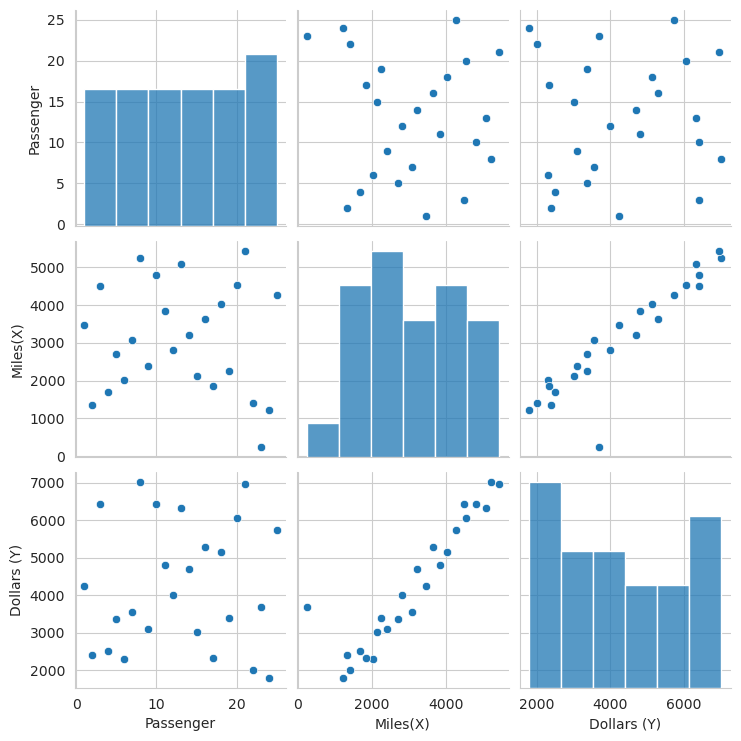

In [4]:
sns.pairplot(data);

# Xét tính tương quang để lọc bớt data

In [5]:
data.corr()

,Passenger,Miles(X),Dollars (Y)
Passenger,1.000000,-0.067441,0.050511
Miles(X),-0.067441,1.000000,0.921729
Dollars (Y),0.050511,0.921729,1.000000


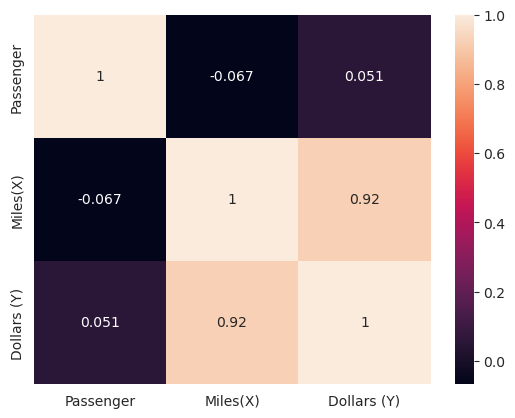

In [6]:
sns.heatmap(data.corr(), annot = True);

In [15]:
X = data.drop(['Dollars (Y)','Passenger'],axis = 1)
y = data['Dollars (Y)']
model = linear_model.LinearRegression()
model.fit(X, y)
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score(X,y))

Hệ số intercept là:  934.5366384552512
Hệ só coeffiient là:  [1.07802533]
Hệ số độ chính xác:  0.8495847755547028


/home/toonies/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


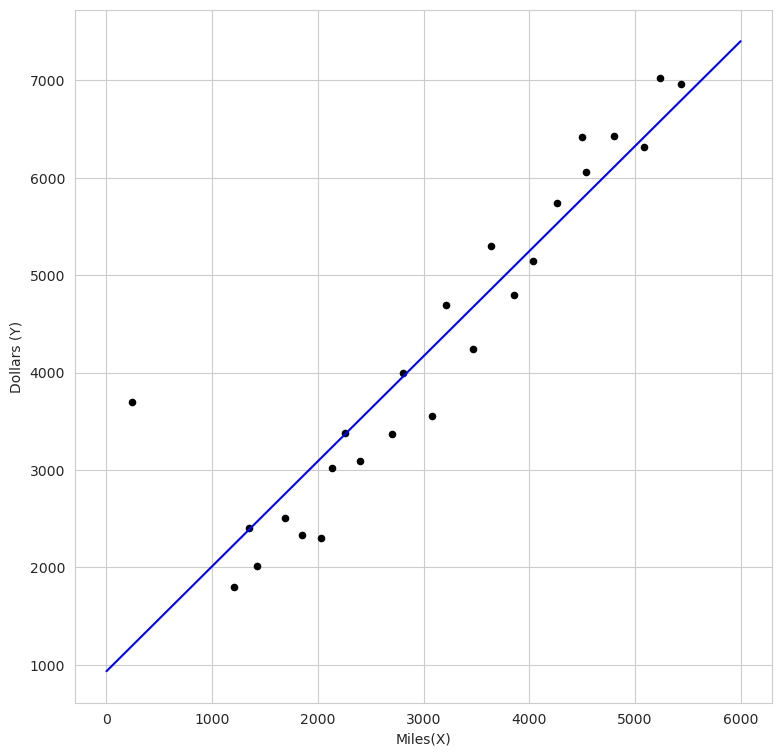

In [19]:
range = np.arange(0,6000,0.1)
X_range = pd.DataFrame([range]).T

y_pred = model.predict(X = X_range)
data.plot(kind = 'scatter', x = 'Miles(X)', y = 'Dollars (Y)', figsize = (9,9), color = 'black')
plt.plot(range, y_pred, color = 'blue');

# Lọc bớt đoạn nhiễu để cải thiện model

In [21]:
data = data.loc[(data['Miles(X)']>1000)]

X = data.drop(['Dollars (Y)','Passenger'],axis = 1)
y = data['Dollars (Y)']
model = linear_model.LinearRegression()
model.fit(X, y)
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score(X,y))

Hệ số intercept là:  244.47360231679386
Hệ só coeffiient là:  [1.26076427]
Hệ số độ chính xác:  0.9666187305460288


/home/toonies/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


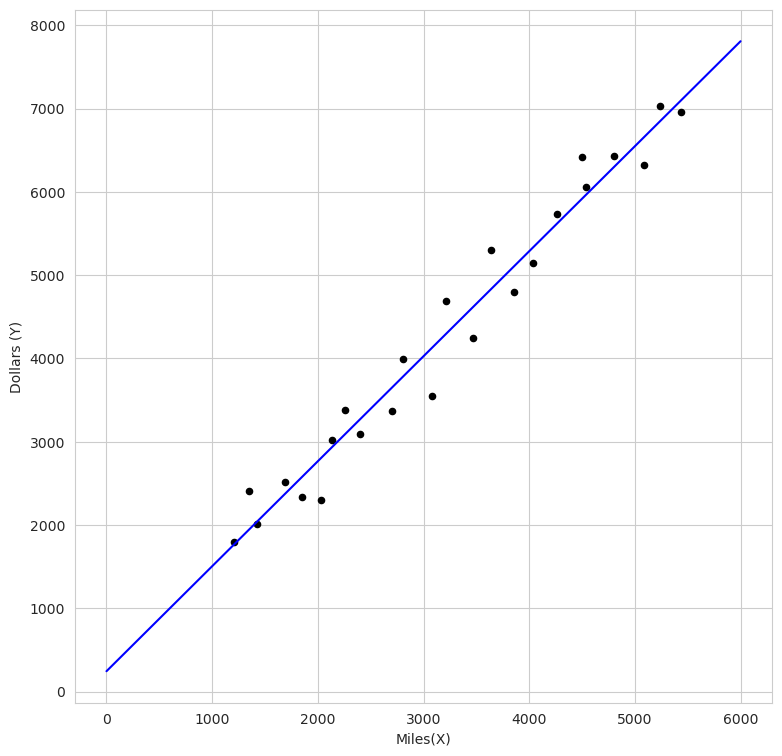

In [22]:
range = np.arange(0,6000,0.1)
X_range = pd.DataFrame([range]).T

y_pred = model.predict(X = X_range)
data.plot(kind = 'scatter', x = 'Miles(X)', y = 'Dollars (Y)', figsize = (9,9), color = 'black')
plt.plot(range, y_pred, color = 'blue');